In [1]:
import os
from pathlib import Path
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
%matplotlib widget

(1000.0, 3000.0, 0.0, 500.0)

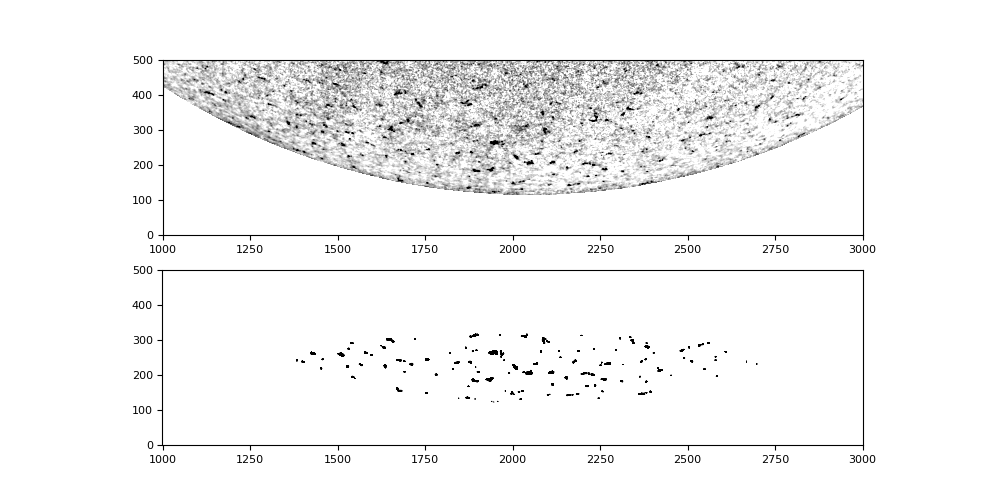

In [4]:
datadir = Path(os.environ['DATA'], 'HMI', 'Polar_Faculae', '2019', '2019_03')
pf_files = sorted(Path(datadir, 'PFe_south').glob('*.fits'))
images = sorted(Path(datadir, 'Avg_maps').glob('*.fits'))

matplotlib.rcParams.update({'font.size': 8})

pf = fits.getdata(pf_files[0])
int_im = fits.getdata(images[0])
vmin = np.percentile(int_im, 50)
vmax = np.percentile(int_im, 99)
# Preview images and faculae masks
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
im = axs[0].imshow(int_im, origin='lower', cmap='gray_r', vmin=vmin, vmax=vmax)
axs[0].axis([1000, 3000, 0, 500])

im = axs[1].imshow(pf[0:2048, :], origin='lower', cmap='gray_r', vmin=0, vmax=1)
axs[1].axis([1000, 3000, 0, 500])

In [ ]:
datadir = Path(os.environ['DATA'], 'HMI', 'Polar_Faculae', '2021_03')
pf_files = sorted(Path(datadir, 'PFe_south').glob('*.fits'))
images = sorted(Path(datadir, 'Avg_maps').glob('*.fits'))